# LDAMark

This notebook shows how to compare two different LDA modeler implementations using LDAMark software.

The best way to perform a comparative analysis is through benchmarking. Benchmarking, in terms of software algorithmic design, is the execution and timing of code, analysis of time usage, and reduction of runtime through optimization. A comparative benchmark would involve the running of corresponding pieces of code among two or more programs in order to compare their efficiency at dealing with identical tasks.

In [ ]:
import pandas as pd
import numpy as np

#TODO Determine the log file to use for data
benchmarks = pd.read_csv('log.csv')
print benchmarks


The Pandas library allows users to effeciently and effectively manage data without making them do the tedious work of reorganizing, classifying, and building data structures. 

In [ ]:
%pylab inline

corpuses = benchmarks['corpus'].unique()
implementations = benchmarks['implementation'].unique()
method = benchmarks['method'].unique()


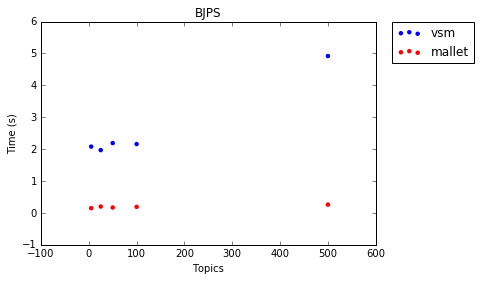

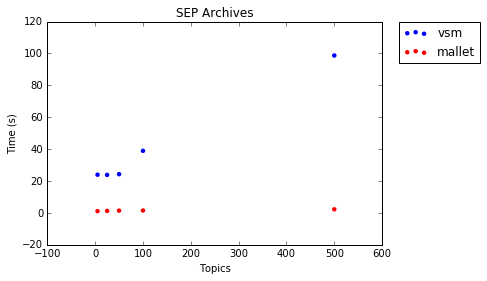

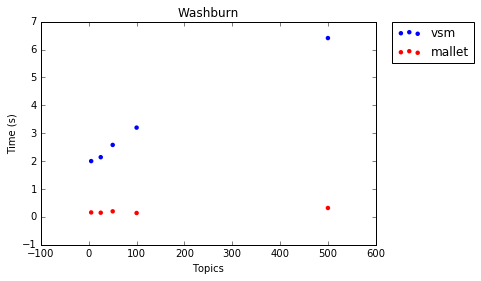

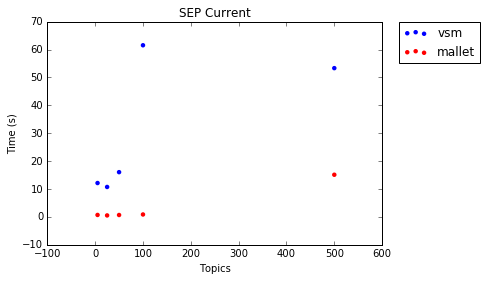

In [107]:
#for each corpus, series of time vs topic number

def chart(corpuses, implementations, ratio=None):
# Builds a chart for each corpus displaying unique data points for each implementation
# Displays ratios with given ratio as baseline, otherwise raw time is shown if ratio is None

    for corpus in corpuses:
        for implementation in implementations:
            y = benchmarks[benchmarks.corpus == corpus][benchmarks.implementation == implementation].system
            x = benchmarks[benchmarks.corpus == corpus][benchmarks.implementation == implementation].topics

            if ratio is not None:
                base = benchmarks[benchmarks.corpus == corpus][benchmarks.implementation == ratio].system
                y = np.array(y)
                base = np.array(base)
                y = y/base

            if implementation == 'vsm':
                c = 'b'
            else:
                c = 'r'

            scatter(x, y, c=c, edgecolor='none', label=implementation)

        title(corpus)
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        xlabel('Topics')
        ylabel('Time (s)')
        show()
        
chart(corpuses, implementations)

# Alternate Commands using Pandas 

Commands below are examples using the 'benchmarks' dataset from above.

### Printing each row of 'system' column for 'corpus' being 'BJPS'
    for i in benchmarks.loc[benchmarks['corpus'] == 'BJPS'].system:
        print i

## Ultra Chain
By building up or chainging multiple commands, complex results may be obtained. To start out simply, the following code prints the 'corpus' column of the dataset. 

    print benchmarks.corpus

or this will do the same thing:
   
    print benchmarks['corpus']
   
The following prints out every row of the dataset whose 'corpus' column value is equal to 'BJPS'

    #print benchmarks[benchmarks['corpus'] == 'BJPS']

Combining pieces of code, the following will pull out the system column of the data set including rows of data whose corpus value is 'BJPS' and whose implementation value is 'vsm'.

    benchmarks[benchmarks.corpus == 'BJPS'][benchmarks.implementation == 'vsm'].system
